# Neural Net testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("updated.csv", low_memory=False)
df.head()

,Age (days),#ofPosts,Posts/Day,OddsBeingBot
0,4256,23279,5.469690,0.020441
1,4124,525,0.127304,0.073133
2,4313,8146,1.888709,0.041325
3,4226,3510,0.830573,0.014311
4,4351,8146,1.872213,0.058340


## Preparing for neural net, train/test, etc

In [3]:
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
seed(1)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

### Train/test

In [4]:
X = df.drop(columns = 'OddsBeingBot')
y = df['OddsBeingBot']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
scaler = StandardScaler()

No need for pipeline, all are num

In [7]:
X_train_proc = scaler.fit_transform(X_train)
X_test_proc = scaler.transform(X_test)

### Define network structure

Number of features

In [8]:
input_shape = X_train_proc.shape[1]
input_shape

3

In [9]:
base_model = Sequential()

#### Regression means linear activaiton function

In [10]:
#hidden layer 1
base_model.add(Dense(10,
                     input_dim = input_shape,
                     activation = 'relu'))
#hidden layer 2
base_model.add(Dense(10,
                     activation = 'relu'))

In [11]:
# Output layer
base_model.add(Dense(1, activation = 'relu'))

### Compiling

In [12]:
from tensorflow.keras import metrics

In [13]:
# Step 2: Compile
base_model.compile(loss='bce', optimizer='adam',metrics=[ 'accuracy',
                                                        metrics.Precision(),
                                                        metrics.Recall()])

In [14]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [15]:
base_model = Sequential()
#hidden layer 1
base_model.add(Dense(10,
                     input_dim = input_shape,
                     activation = 'relu'))
#hidden layer 2
base_model.add(Dense(10,
                     activation = 'relu'))
base_model.add(Dense(1, activation='linear'))

base_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [17]:
base_history = base_model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test), 
                    epochs=50)

Epoch 1/50
263/263 [==============================] - 3s 7ms/step - loss: 0.1046 - mean_absolute_error: 0.1887 - root_mean_squared_error: 0.3235 - val_loss: 0.0576 - val_mean_absolute_error: 0.1810 - val_root_mean_squared_error: 0.2399
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0584 - mean_absolute_error: 0.1809 - root_mean_squared_error: 0.2417 - val_loss: 0.0575 - val_mean_absolute_error: 0.1741 - val_root_mean_squared_error: 0.2397
Epoch 3/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0581 - mean_absolute_error: 0.1787 - root_mean_squared_error: 0.2411 - val_loss: 0.0564 - val_mean_absolute_error: 0.1693 - val_root_mean_squared_error: 0.2376
Epoch 4/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0580 - mean_absolute_error: 0.1781 - root_mean_squared_error: 0.2408 - val_loss: 0.0565 - val_mean_absolute_error: 0.1740 - val_root_mean_squared_error: 0.2376
Epoch 5/50
263/263 [==============================] - 1s

Epoch 36/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0576 - mean_absolute_error: 0.1779 - root_mean_squared_error: 0.2399 - val_loss: 0.0567 - val_mean_absolute_error: 0.1809 - val_root_mean_squared_error: 0.2380
Epoch 37/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0575 - mean_absolute_error: 0.1783 - root_mean_squared_error: 0.2399 - val_loss: 0.0565 - val_mean_absolute_error: 0.1777 - val_root_mean_squared_error: 0.2377
Epoch 38/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0575 - mean_absolute_error: 0.1776 - root_mean_squared_error: 0.2398 - val_loss: 0.0565 - val_mean_absolute_error: 0.1746 - val_root_mean_squared_error: 0.2378
Epoch 39/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.1778 - root_mean_squared_error: 0.2399 - val_loss: 0.0569 - val_mean_absolute_error: 0.1834 - val_root_mean_squared_error: 0.2386
Epoch 40/50
263/263 [==============================]

In [18]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

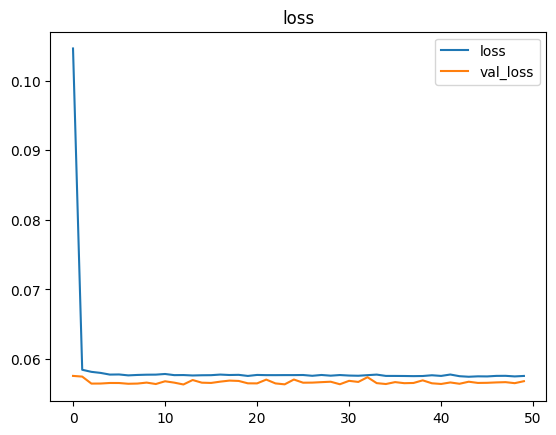

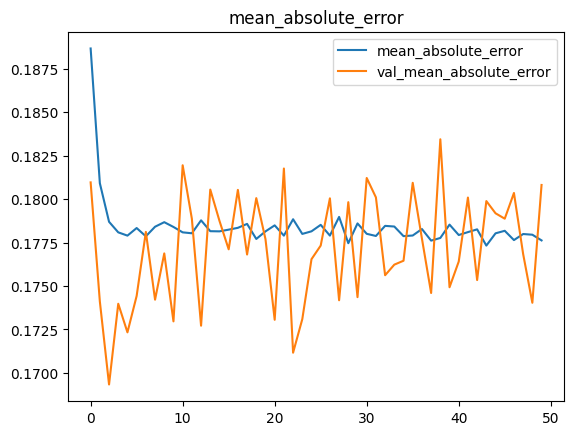

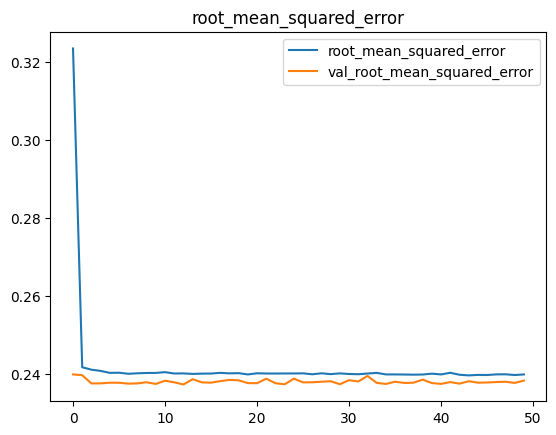

In [19]:
plot_history(base_history)

In [ ]:
history = base_model.fit(X_train_proc, y_train,  
                        validation_data=(X_test_proc, y_test),
                        epochs=200,
                        verbose=0)
# plot learning history
plot_history(history)b

This model is going to require a ton of changes to get anywhere close to being a good model, will have to try many versions but need to research how things like this happen.